In [1]:
# Installing yfinance to fetch stock data
!pip install yfinance

# Importing libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Downloading Tesla stock data from the past 5 years
tesla = yf.download('TSLA', start='2019-01-01', end='2024-12-31')

# Displaying the first few rows
tesla.head()

/tmp/ipython-input-2-3923020308.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla = yf.download('TSLA', start='2019-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2019-01-02,20.674667,21.008667,19.920000,20.406668,174879000
2019-01-03,20.024000,20.626667,19.825333,20.466667,104478000
2019-01-04,21.179333,21.200001,20.181999,20.400000,110911500
2019-01-07,22.330667,22.449333,21.183332,21.448000,113268000
2019-01-08,22.356667,22.934000,21.801332,22.797333,105127500


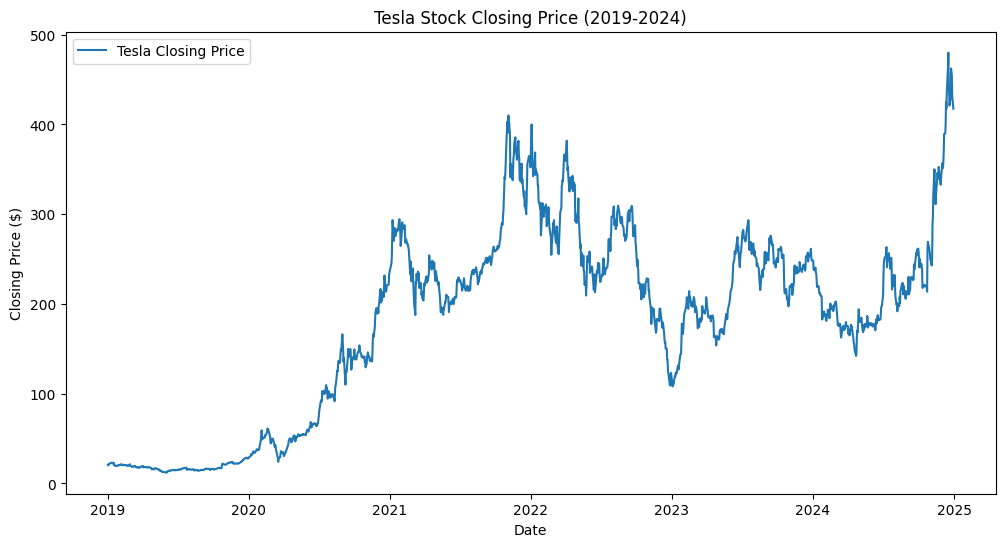

In [3]:
# Visualizing Tesla's closing price over time
plt.figure(figsize=(12,6))
plt.plot(tesla['Close'], label='Tesla Closing Price')
plt.title('Tesla Stock Closing Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()


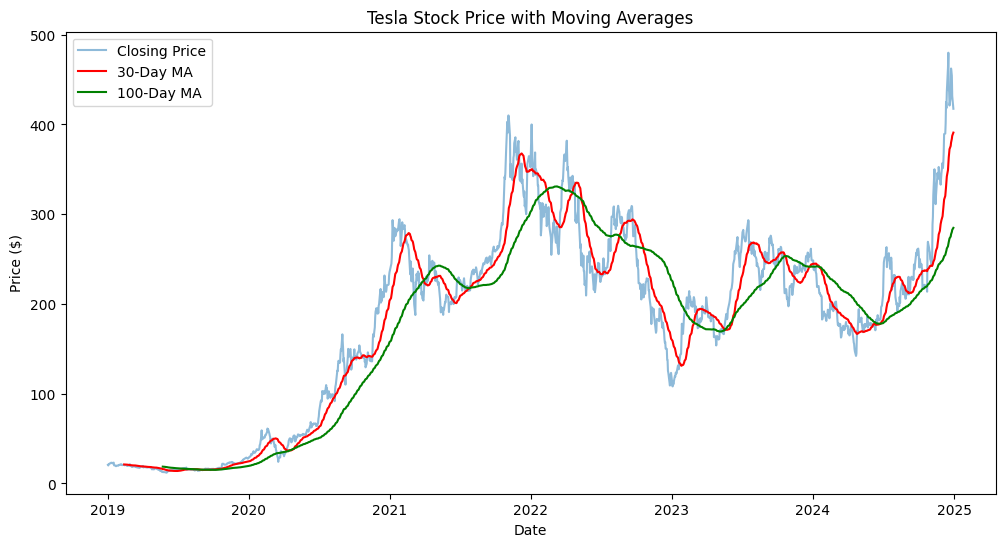

In [4]:
#Using moving averages to help "smooth" short-term fluctuations, which shows long-term trends. Now plotting 30-day and 100-day moving averages alongside the actual closing price

tesla['MA30'] = tesla['Close'].rolling(window=30).mean()
tesla['MA100'] = tesla['Close'].rolling(window=100).mean()

plt.figure(figsize=(12,6))
plt.plot(tesla['Close'], label='Closing Price', alpha=0.5)
plt.plot(tesla['MA30'], label='30-Day MA', color='red')
plt.plot(tesla['MA100'], label='100-Day MA', color='green')
plt.title('Tesla Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

In [5]:
#Re-downloading Tesla Data
import yfinance as yf
import pandas as pd

tesla = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
tesla.reset_index(inplace=True)

print(tesla.shape)
print(tesla.head())

/tmp/ipython-input-5-2033720890.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla = yf.download('TSLA', start='2010-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed

(3400, 6)
Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500


In [6]:
# Create moving averages
tesla['MA30'] = tesla['Close'].rolling(window=30).mean()
tesla['MA100'] = tesla['Close'].rolling(window=100).mean()

# Create Target (next day's closing price)
tesla['Target'] = tesla['Close'].shift(-1)

# Drop missing values (due to moving average and shifting)
tesla.dropna(inplace=True)

print(tesla.shape)
print(tesla.head())

(3300, 9)
Price        Date     Close      High       Low      Open    Volume      MA30  \
Ticker                 TSLA      TSLA      TSLA      TSLA      TSLA             
99     2010-11-17  1.966000  2.050000  1.907333  2.013333  11250000  1.538644   
100    2010-11-18  1.992667  2.049333  1.928000  2.044667  14341500  1.559667   
101    2010-11-19  2.066000  2.091333  1.980000  2.010667  17257500  1.583133   
102    2010-11-22  2.226667  2.230000  2.100000  2.104667  22945500  1.612378   
103    2010-11-23  2.304667  2.378667  2.146000  2.219333  23667000  1.644222   

Price      MA100    Target  
Ticker                      
99      1.399193  1.992667  
100     1.403193  2.066000  
101     1.407967  2.226667  
102     1.415593  2.304667  
103     1.425840  2.364667  


In [9]:
# Define feature columns and target
X = tesla[['MA30', 'MA100']]
y = tesla['Target']

# Check shape
print(X.shape, y.shape)

(3300, 2) (3300,)


In [7]:
#Renaming Column
tesla.rename(columns={'Close': 'Close_TSLA'}, inplace=True)

In [10]:
#Test-Train Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (2640, 2)
Testing data shape: (660, 2)


In [11]:
#Using linear regression from "sklearn" to predict the target (Tesla's future price) using the two moving averages
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1024.3748604007737
R² Score: 0.6990155030512931


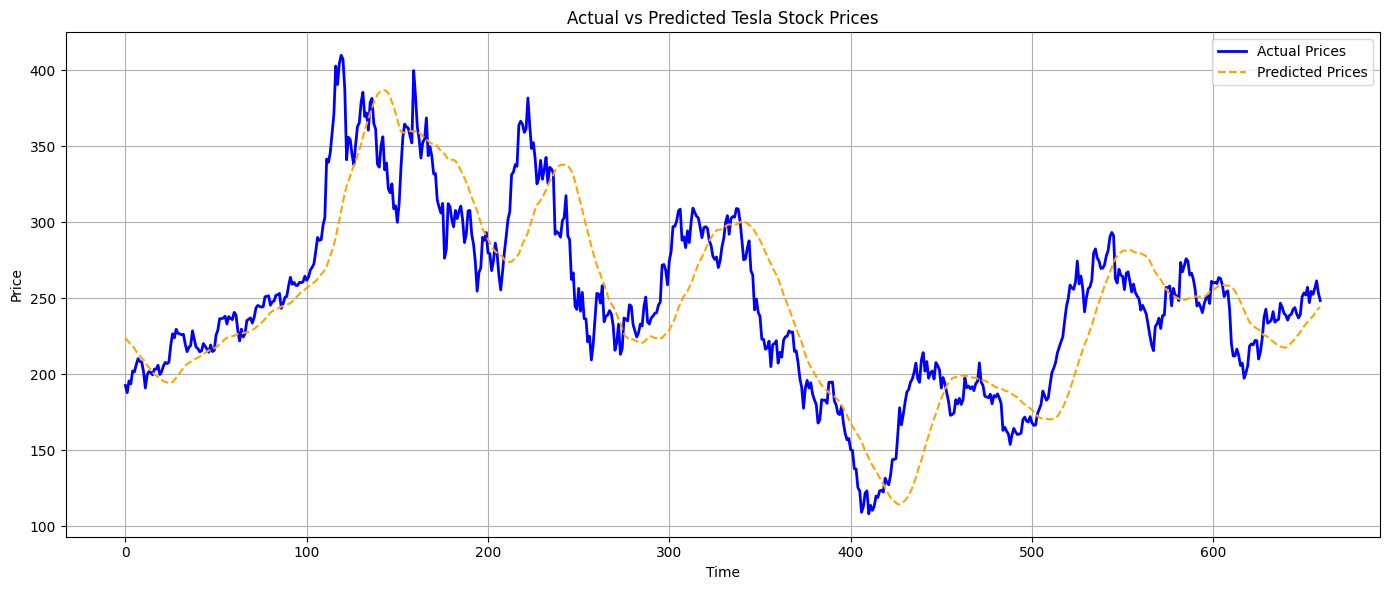

In [12]:
#Visualizaing how well model predicted Tesla's stock prices versus the actual prices
import matplotlib.pyplot as plt

# Predict the test data
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_pred, label='Predicted Prices', color='orange', linestyle='--')
plt.title('Actual vs Predicted Tesla Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()